In [ ]:
#!default_exp app

In [ ]:
!pip install -Uqq fastai gradio

In [ ]:
#!export
from fastai.vision.all import *
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourse_Data_Science/Project_1

/content/drive/My Drive/MasterCourse_Data_Science/Project_1


In [ ]:
#!export
model = load_learner('models/fish-recognizer-v8.pkl')

In [ ]:
#!export
fish_types_labels = [
'Barramundi Fish',
'Bombay Duck Fish',
'Catla Fish',
'Hilsa Fish',
'Indian Featherback Fish',
'Mrigal Carp Fish',
'Pabda Catfish',
'Rohu Fish',
'Salmon Fish',
'Silver Pomfret'
]

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred,probs)
  return dict(zip(fish_types_labels, map(float, probs)))

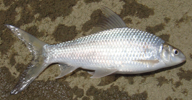

In [ ]:
img = PILImage.create(f'test_images/image1.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

Mrigal Carp Fish tensor([1.7266e-03, 2.8499e-05, 6.9566e-04, 7.8735e-04, 4.1866e-06, 9.8368e-01,
        2.4509e-06, 9.3199e-03, 2.2822e-03, 1.4684e-03])


{'Barramundi Fish': 0.0017266122158616781,
 'Bombay Duck Fish': 2.8499318432295695e-05,
 'Catla Fish': 0.0006956618162803352,
 'Hilsa Fish': 0.0007873527356423438,
 'Indian Featherback Fish': 4.186622390989214e-06,
 'Mrigal Carp Fish': 0.983684778213501,
 'Pabda Catfish': 2.4508824481017655e-06,
 'Rohu Fish': 0.009319883771240711,
 'Salmon Fish': 0.002282222267240286,
 'Silver Pomfret': 0.0014683881308883429}

In [ ]:
image = gr.Image(type="pil", label="Upload fish image")
label = gr.Label()
examples = [
    'test_images/image1.jpg',
    'test_images/image2.jpg',
    'test_images/image3.jpg',
    'test_images/image4.jpeg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://64a867b3485ea5ca27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
